Reference: https://www.kaggle.com/vipulgandhi/linear-regression
https://www.kaggle.com/ishaanv/ISLR-Auto/kernels

In [1]:
import os
os.getcwd()

'C:\\Users\\namrata\\AI practice\\AI Projects'

In [2]:
os.chdir("C:/Users/namrata/Desktop/projects/salesad")

In [3]:
os.getcwd()

'C:\\Users\\namrata\\Desktop\\projects\\salesad'

In [4]:
# Import the numpy and pandas package

import numpy as np
import pandas as pd

# Data Visualisation
import matplotlib.pyplot as plt 
import seaborn as sns


In [5]:
data = pd.read_csv('advertising.csv')

In [7]:
data.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
TV           200 non-null float64
Radio        200 non-null float64
Newspaper    200 non-null float64
Sales        200 non-null float64
dtypes: float64(4)
memory usage: 6.3 KB


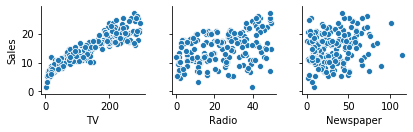

In [15]:
sns.pairplot(data, x_vars=['TV','Radio','Newspaper'], y_vars='Sales', size = 2)

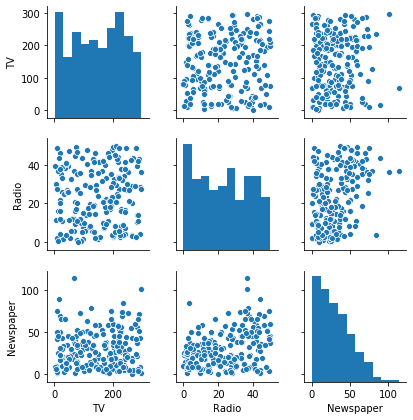

In [16]:
sns.pairplot(data[['TV','Radio','Newspaper']],size = 2)

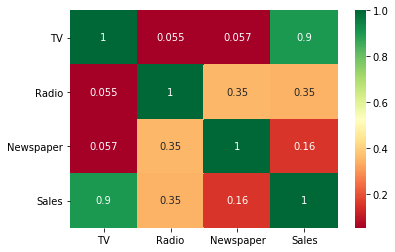

In [32]:
sns.heatmap(data.corr(), cmap="RdYlGn", annot = True)


 Colormap GnBu_d is not recognized. Possible values are: Accent, Accent_r, Blues, Blues_r, BrBG, BrBG_r, BuGn, BuGn_r, BuPu, BuPu_r, CMRmap, CMRmap_r, Dark2, Dark2_r, GnBu, GnBu_r, Greens, Greens_r, Greys, Greys_r, OrRd, OrRd_r, Oranges, Oranges_r, PRGn, PRGn_r, Paired, Paired_r, Pastel1, Pastel1_r, Pastel2, Pastel2_r, PiYG, PiYG_r, PuBu, PuBuGn, PuBuGn_r, PuBu_r, PuOr, PuOr_r, PuRd, PuRd_r, Purples, Purples_r, RdBu, RdBu_r, RdGy, RdGy_r, RdPu, RdPu_r, RdYlBu, RdYlBu_r, RdYlGn, RdYlGn_r, Reds, Reds_r, Set1, Set1_r, Set2, Set2_r, Set3, Set3_r, Spectral, Spectral_r, Wistia, Wistia_r, YlGn, YlGnBu, YlGnBu_r, YlGn_r, YlOrBr, YlOrBr_r, YlOrRd, YlOrRd_r, afmhot, afmhot_r, autumn, autumn_r, binary, binary_r, bone, bone_r, brg, brg_r, bwr, bwr_r, cividis, cividis_r, cool, cool_r, coolwarm, coolwarm_r, copper, copper_r, cubehelix, cubehelix_r, flag, flag_r, gist_earth, gist_earth_r, gist_gray, gist_gray_r, gist_heat, gist_heat_r, gist_ncar, gist_ncar_r, gist_rainbow, gist_rainbow_r, gist_stern, gist_stern_r, gist_yarg, gist_yarg_r, gnuplot, gnuplot2, gnuplot2_r, gnuplot_r, gray, gray_r, hot, hot_r, hsv, hsv_r, icefire, icefire_r, inferno, inferno_r, jet, jet_r, magma, magma_r, mako, mako_r, nipy_spectral, nipy_spectral_r, ocean, ocean_r, pink, pink_r, plasma, plasma_r, prism, prism_r, rainbow, rainbow_r, rocket, rocket_r, seismic, seismic_r, spring, spring_r, summer, summer_r, tab10, tab10_r, tab20, tab20_r, tab20b, tab20b_r, tab20c, tab20c_r, terrain, terrain_r, twilight, twilight_r, twilight_shifted, twilight_shifted_r, viridis, viridis_r, vlag, vlag_r, winter, winter_r

**Scikit-Learn Multi LR model**

In [37]:
from sklearn.linear_model import LinearRegression 

In [38]:
X = data[['TV', 'Radio', 'Newspaper']]
y = data[["Sales"]]

In [39]:
skl_mlr = LinearRegression()
skl_results = skl_mlr.fit(X,y)

In [42]:
skl_results.intercept_

array([4.62512408])

In [44]:
skl_results.coef_

array([[0.05444578, 0.10700123, 0.00033566]])

**Statistics Multi LR model**

In [34]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
mlr = smf.ols(formula='Sales ~ TV + Radio + Newspaper', data=data)
result = mlr.fit()

In [36]:
result.params

Intercept    4.625124
TV           0.054446
Radio        0.107001
Newspaper    0.000336
dtype: float64

In [49]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.903
Model:                            OLS   Adj. R-squared:                  0.901
Method:                 Least Squares   F-statistic:                     605.4
Date:                Fri, 17 Apr 2020   Prob (F-statistic):           8.13e-99
Time:                        10:52:00   Log-Likelihood:                -383.34
No. Observations:                 200   AIC:                             774.7
Df Residuals:                     196   BIC:                             787.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.6251      0.308     15.041      0.000       4.019       5.232
TV             0.0544      0.001     39.592      0.000       0.052       0.057
Radio          0.1070      0.008     12.604      0.000       0.090       0.124
Newspaper      0.0003      0.006      0.058      0.954      -0.011       0.012
==============================================================================
Omnibus:                       16.081   Durbin-Watson:                   2.251
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               27.655
Skew:                          -0.431   Prob(JB):                     9.88e-07
Kurtosis:                       4.605   Cond. No.                         454.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

H0: features of X are not related to y  
H1: features are related  
- F statistics >>>1 , X is associated with Y
  
H0: TV, Radio, Newspaper are affecting Y  
H1: they are not affecting Y  
- p value of newspaper is > 0.05, fail to reject null hypothesis for newspaper 
- p values of Radio and TV <0.05, reject null hypothesis for radio and tv. 

R^2 for multi LR > R^2 for simple LR

**Retraining the model with radio and TV**

In [55]:
mlr = smf.ols(formula='Sales ~ TV + Radio', data=data)
result = mlr.fit()

In [56]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.903
Model:                            OLS   Adj. R-squared:                  0.902
Method:                 Least Squares   F-statistic:                     912.7
Date:                Fri, 17 Apr 2020   Prob (F-statistic):          2.39e-100
Time:                        10:59:30   Log-Likelihood:                -383.34
No. Observations:                 200   AIC:                             772.7
Df Residuals:                     197   BIC:                             782.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.6309      0.290     15.952      0.000       4.058       5.203
TV             0.0544      0.001     39.726      0.000       0.052       0.057
Radio          0.1072      0.008     13.522      0.000       0.092       0.123
==============================================================================
Omnibus:                       16.227   Durbin-Watson:                   2.252
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               27.973
Skew:                          -0.434   Prob(JB):                     8.43e-07
Kurtosis:                       4.613   Cond. No.                         425.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [59]:
model1 = smf.ols(formula="Sales~TV + Radio + Newspaper", data=data).fit()
model2 = smf.ols(formula="Sales~ TV + Radio", data=data).fit()
model3 = smf.ols(formula="Sales~TV", data=data).fit()
print(model1.summary())
print(model2.summary())
print(model3.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.903
Model:                            OLS   Adj. R-squared:                  0.901
Method:                 Least Squares   F-statistic:                     605.4
Date:                Fri, 17 Apr 2020   Prob (F-statistic):           8.13e-99
Time:                        11:11:04   Log-Likelihood:                -383.34
No. Observations:                 200   AIC:                             774.7
Df Residuals:                     196   BIC:                             787.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.6251      0.308     15.041      0.0

**Model 1 and 2 have same R^2, Checking AIC and BIC, model 2 has lower value than model 1.=> Model 2 selected**